## How are in-demand skills trending for Data Scientist and Data Analysts?

##### Methology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

##### Original Exploration

[12_Trending_Skills.ipynb](2_Advance\12_Trending_Skills.ipynb)

### Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


# lodaing data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

### Group the Skills by Month

Select only those job postings that are for Data Scientist and Data Analysts and the job country is the United Kingdom. Then extract the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [2]:
## Skill count per month for data scientists
df_DS_UK = df[(df['job_title'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

df_DS_UK['job_posted_month_no'] = df_DS_UK['job_posted_date'].dt.month

# Explode job_skills column
df_DS_UK_explode = df_DS_UK.explode('job_skills')

In [4]:
## Skill count per month for data analysts
df_DA_UK = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

df_DA_UK['job_posted_month_no'] = df_DA_UK['job_posted_date'].dt.month

# Explode job_skills column
df_DA_UK_explode = df_DA_UK.explode('job_skills')

### Pivot in Prep for Plotting

Create a pivot table from the df_DS_UK_explode and df_DA_UK_explode, setting 'month' as the index, job_skills as the columns, and fills missing entries with zero.

In [6]:
# Group by month and job_skills
df_DS_UK_pivot = df_DS_UK_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DS_UK_pivot

job_skills,airflow,alteryx,angular,ansible,asp.net,assembly,atlassian,aurora,aws,azure,...,unix,vba,visual basic,vmware,watson,windows,word,wsl,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11,3,0,0,1,0,0,0,96,59,...,0,4,0,0,0,0,3,0,2,0
2,5,0,0,0,0,0,0,0,58,49,...,1,0,0,0,2,0,6,0,2,2
3,6,4,0,0,0,0,0,0,50,41,...,0,0,0,0,5,0,3,0,0,0
4,1,1,0,0,1,0,2,0,19,25,...,1,1,0,0,0,0,5,0,0,0
5,5,0,0,0,0,0,0,0,34,29,...,1,0,0,0,1,0,1,0,0,1
6,2,2,0,0,1,0,0,0,57,42,...,0,0,0,0,0,0,3,0,0,0
7,2,3,0,1,0,0,0,0,43,48,...,2,1,0,0,1,1,2,0,0,2
8,3,3,0,2,0,0,2,0,36,43,...,3,0,0,0,0,1,2,0,0,2
9,2,3,0,2,1,0,0,0,56,46,...,4,10,0,0,0,0,2,0,0,0


In [7]:
# Group by month and job_skills
df_DA_UK_pivot = df_DA_UK_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_UK_pivot

job_skills,airflow,airtable,alteryx,asana,assembly,atlassian,aurora,aws,azure,bash,...,unreal,vba,visio,visual basic,vmware,watson,windows,wire,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1,0,8,0,0,1,0,10,26,1,...,0,16,9,3,0,0,2,0,28,0
2,0,0,7,0,0,0,0,8,28,2,...,0,7,2,0,2,0,4,0,16,0
3,0,0,2,0,0,0,0,7,13,0,...,0,10,0,1,0,0,2,0,10,1
4,1,0,2,0,0,0,0,7,9,0,...,0,5,0,1,0,0,3,0,10,0
5,2,0,3,0,0,1,0,8,16,0,...,0,7,3,0,0,0,0,0,8,0
6,1,0,1,0,1,0,1,15,19,0,...,0,9,2,0,0,0,1,0,12,0
7,2,0,1,0,0,0,0,13,31,0,...,0,9,0,1,2,0,3,0,16,0
8,0,0,0,0,0,0,0,9,17,0,...,0,7,0,1,1,0,4,1,11,0
9,2,0,4,1,0,0,1,17,24,0,...,0,25,0,5,1,1,1,0,13,1


### Sort columns by count and change month numbers to names

It adds a new row labeled Total that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.

In [8]:
# sorts by count
df_DS_UK_pivot.loc['Total'] = df_DS_UK_pivot.sum()
df_DS_UK_pivot = df_DS_UK_pivot[df_DS_UK_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_UK_pivot = df_DS_UK_pivot.drop('Total')

df_DS_UK_pivot

job_skills,python,sql,r,aws,azure,tableau,pandas,numpy,power bi,spark,...,huggingface,powershell,ruby on rails,planner,phoenix,react.js,terminal,spreadsheet,vmware,wsl
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,299,213,122,96,59,56,47,44,31,36,...,0,0,0,0,0,0,0,0,0,0
2,209,137,79,58,49,29,27,19,15,26,...,0,0,0,0,0,0,0,1,0,0
3,163,108,58,50,41,27,33,28,21,15,...,0,0,0,0,0,0,0,0,0,0
4,113,73,36,19,25,21,20,21,16,16,...,0,0,0,0,0,0,0,0,0,0
5,113,80,51,34,29,21,23,17,18,20,...,0,0,1,0,0,0,0,0,0,0
6,199,123,88,57,42,30,40,34,28,28,...,0,0,0,0,0,0,0,0,0,0
7,168,102,60,43,48,34,34,28,26,17,...,0,0,0,0,0,0,1,0,0,0
8,171,110,82,36,43,30,19,19,29,18,...,0,0,0,0,0,1,0,0,0,0
9,245,144,98,56,46,41,42,32,35,29,...,1,0,0,0,0,0,0,0,0,0


In [9]:
# sorts by count
df_DA_UK_pivot.loc['Total'] = df_DA_UK_pivot.sum()
df_DA_UK_pivot = df_DA_UK_pivot[df_DA_UK_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_UK_pivot = df_DA_UK_pivot.drop('Total')

df_DA_UK_pivot

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,drupal,assembly,monday.com,pytorch,node,powerbi,unreal,terraform,watson,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,255,226,157,95,91,50,74,26,15,32,...,0,0,0,0,1,0,0,0,0,0
2,182,162,92,61,57,37,38,28,14,16,...,0,0,0,0,0,0,0,0,0,0
3,119,105,71,47,50,31,14,13,18,11,...,0,0,0,0,0,0,0,0,0,0
4,84,78,46,40,28,17,24,9,11,7,...,0,0,0,0,0,1,0,0,0,0
5,114,84,59,30,29,18,8,16,12,9,...,0,0,0,0,0,0,0,0,0,0
6,102,95,79,36,37,17,8,19,12,17,...,0,1,0,0,0,0,0,0,0,0
7,131,113,97,52,42,29,34,31,14,18,...,1,0,0,0,0,0,0,0,0,0
8,109,78,64,39,39,16,10,17,13,7,...,0,0,0,0,0,0,0,0,0,1
9,211,167,130,99,87,58,24,24,15,11,...,0,0,0,0,0,0,0,0,1,0


### Plot the Monthly Skill Counts

Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them.

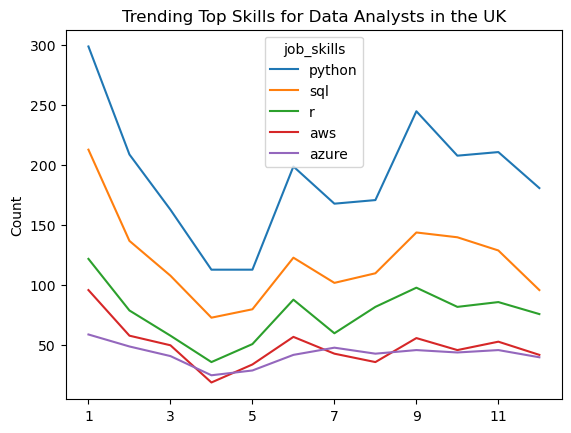

In [10]:
df_DS_UK_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the UK')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

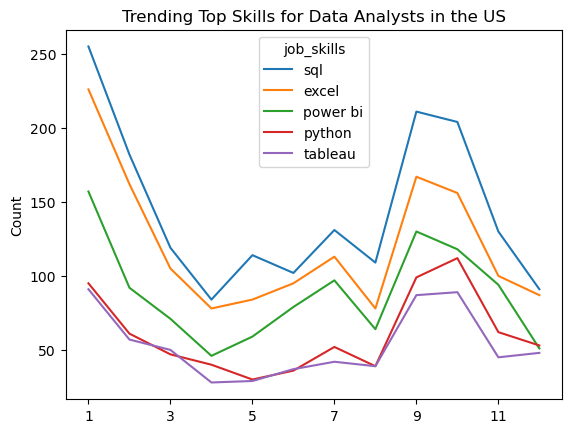

In [11]:
df_DA_UK_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

### Calculate Percentage of Total Jobs

Calculates the total number of entries for each month in df_DA by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in DA_totals. This is needed to compute the percentages.

In [12]:
# Get monthly totals
DA_totals = df_DS_UK.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     397
2     269
3     217
4     156
5     150
6     242
7     194
8     220
9     326
10    266
11    261
12    228
dtype: int64

In [13]:
# Get monthly totals
DA_totals = df_DA_UK.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     519
2     355
3     237
4     175
5     202
6     215
7     253
8     212
9     369
10    369
11    266
12    205
dtype: int64

This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the df_DA_pivot DataFrame, which contains skill counts, by the monthly totals in DA_totals and multiplying by 100. The new DataFrame, df_DA_pivot_percent, shows skill distributions as percentages of total monthly job entries.

In [18]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DS_UK_percent = df_DS_UK_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DS_UK_percent = df_DS_UK_percent.reset_index()
df_DS_UK_percent['job_posted_month'] = df_DS_UK_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DS_UK_percent = df_DS_UK_percent.set_index('job_posted_month')
df_DS_UK_percent = df_DS_UK_percent.drop(columns='job_posted_month_no')

df_DS_UK_percent

job_skills,python,sql,r,aws,azure,tableau,pandas,numpy,power bi,spark,...,huggingface,powershell,ruby on rails,planner,phoenix,react.js,terminal,spreadsheet,vmware,wsl
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,57.610790,41.040462,23.506744,18.497110,11.368015,10.789981,9.055877,8.477842,5.973025,6.936416,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
Feb,58.873239,38.591549,22.253521,16.338028,13.802817,8.169014,7.605634,5.352113,4.225352,7.323944,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.28169,0.00000,0.000000
Mar,68.776371,45.569620,24.472574,21.097046,17.299578,11.392405,13.924051,11.814346,8.860759,6.329114,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
Apr,64.571429,41.714286,20.571429,10.857143,14.285714,12.000000,11.428571,12.000000,9.142857,9.142857,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
May,55.940594,39.603960,25.247525,16.831683,14.356436,10.396040,11.386139,8.415842,8.910891,9.900990,...,0.000000,0.00000,0.49505,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
Jun,92.558140,57.209302,40.930233,26.511628,19.534884,13.953488,18.604651,15.813953,13.023256,13.023256,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
Jul,66.403162,40.316206,23.715415,16.996047,18.972332,13.438735,13.438735,11.067194,10.276680,6.719368,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.395257,0.00000,0.00000,0.000000
Aug,80.660377,51.886792,38.679245,16.981132,20.283019,14.150943,8.962264,8.962264,13.679245,8.490566,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.471698,0.000000,0.00000,0.00000,0.000000
Sep,66.395664,39.024390,26.558266,15.176152,12.466125,11.111111,11.382114,8.672087,9.485095,7.859079,...,0.271003,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000


In [17]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_UK_percent = df_DA_UK_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_UK_percent = df_DA_UK_percent.reset_index()
df_DA_UK_percent['job_posted_month'] = df_DA_UK_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_UK_percent = df_DA_UK_percent.set_index('job_posted_month')
df_DA_UK_percent = df_DA_UK_percent.drop(columns='job_posted_month_no')

df_DA_UK_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,drupal,assembly,monday.com,pytorch,node,powerbi,unreal,terraform,watson,wire
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,49.132948,43.545279,30.250482,18.304432,17.533719,9.633911,14.258189,5.009634,2.890173,6.165703,...,0.000000,0.000000,0.000000,0.000000,0.192678,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.267606,45.633803,25.915493,17.183099,16.056338,10.422535,10.704225,7.887324,3.943662,4.507042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,50.210970,44.303797,29.957806,19.831224,21.097046,13.080169,5.907173,5.485232,7.594937,4.641350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,48.000000,44.571429,26.285714,22.857143,16.000000,9.714286,13.714286,5.142857,6.285714,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000
May,56.435644,41.584158,29.207921,14.851485,14.356436,8.910891,3.960396,7.920792,5.940594,4.455446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,47.441860,44.186047,36.744186,16.744186,17.209302,7.906977,3.720930,8.837209,5.581395,7.906977,...,0.000000,0.465116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,51.778656,44.664032,38.339921,20.553360,16.600791,11.462451,13.438735,12.252964,5.533597,7.114625,...,0.395257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.415094,36.792453,30.188679,18.396226,18.396226,7.547170,4.716981,8.018868,6.132075,3.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.471698
Sep,57.181572,45.257453,35.230352,26.829268,23.577236,15.718157,6.504065,6.504065,4.065041,2.981030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271003,0.000000


### Plot Monthly Skill Demand

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the df_DA_pivot_percent DataFrame. Also the legend is moved outside of the plot for readability.

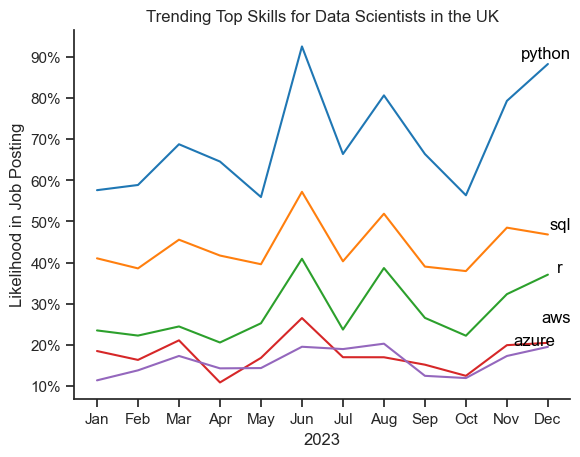

In [24]:
from adjustText import adjust_text

# plot lines
df_plot = df_DS_UK_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Scientists in the UK')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# add labels with adjustText
texts = []
for i in range(5):
    texts.append(
        plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')
    )

adjust_text(texts, only_move={'points':'y', 'text':'y'}, arrowprops=dict(arrowstyle="->", lw=0.5))
plt.show()


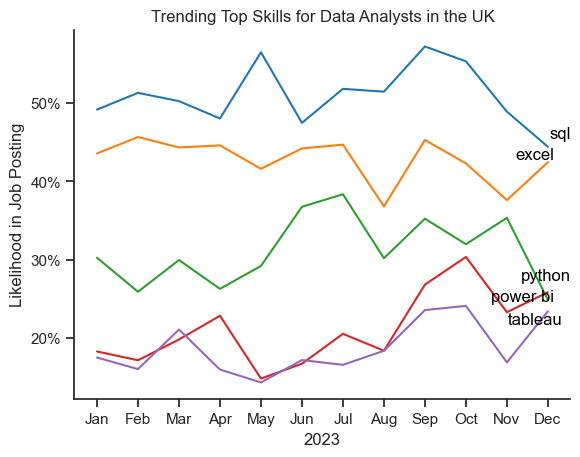

In [25]:
from adjustText import adjust_text

# plot lines
df_plot = df_DA_UK_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the UK')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# add labels with adjustText
texts = []
for i in range(5):
    texts.append(
        plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')
    )

adjust_text(texts, only_move={'points':'y', 'text':'y'}, arrowprops=dict(arrowstyle="->", lw=0.5))
plt.show()
